#Nike Global Sales Data (2024)

Explore um conjunto de dados abrangente das vendas globais da Nike para o ano de 2024, abrangendo diversas regiões, categorias de produtos e faixas de preço.

Fonte: https://www.kaggle.com/datasets/ayushcx/nike-global-sales-data-2024

##1. Bibliotecas

In [96]:
# Bibliotecas principais
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google_drive_downloader import GoogleDriveDownloader as gdd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

sns.set_style("whitegrid")

# Configurações gerais
plt.rcParams['figure.figsize'] = (12, 6)
pd.options.display.float_format = '{:.2f}'.format

##2. Carregando e visualizando a base de dados

In [97]:
# Carregando dados do Google Drive
dadosgoogleid = '1etKSfPx4riaMlDrevvqvzhY5GKykZj2z'

gdd.download_file_from_google_drive(file_id=dadosgoogleid, dest_path = './dados_google_drive.csv',showsize = True)

data = pd.read_csv("dados_google_drive.csv", sep = ',')

In [98]:
# Visualizando as primeiras linhas
data.head()

,Month,Region,Main_Category,Sub_Category,Product_Line,Price_Tier,Units_Sold,Revenue_USD,Online_Sales_Percentage,Retail_Price
0,November,India,Equipment,Bags,Gym Sack,Budget,48356,14506800,73,300
1,January,India,Equipment,Accessories,Hats,Budget,9842,2066820,50,210
2,October,India,Apparel,Tops,Tech Fleece,Mid-Range,25079,1755530,90,70
3,December,Greater China,Footwear,Cricket,Vapor Cricket,Premium,41404,8694840,58,210
4,May,Greater China,Equipment,Socks,Performance Socks,Premium,33569,5371040,53,160


In [99]:
# Resumo estatístico e informações gerais
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Month                    1000 non-null   object
 1   Region                   1000 non-null   object
 2   Main_Category            1000 non-null   object
 3   Sub_Category             1000 non-null   object
 4   Product_Line             1000 non-null   object
 5   Price_Tier               1000 non-null   object
 6   Units_Sold               1000 non-null   int64 
 7   Revenue_USD              1000 non-null   int64 
 8   Online_Sales_Percentage  1000 non-null   int64 
 9   Retail_Price             1000 non-null   int64 
dtypes: int64(4), object(6)
memory usage: 78.3+ KB


,Units_Sold,Revenue_USD,Online_Sales_Percentage,Retail_Price
count,1000.00,1000.00,1000.00,1000.00
mean,28498.95,5039576.41,70.04,176.32
std,12926.50,3267216.81,11.75,75.26
min,5028.00,287400.00,50.00,50.00
25%,17554.25,2344675.00,60.00,110.00
50%,28685.00,4328020.00,71.00,180.00
75%,40026.00,7264942.50,80.00,240.00
max,49992.00,14864700.00,90.00,300.00


In [100]:
print(data['Month'].unique())

['November' 'January' 'October' 'December' 'May' 'July' 'April' 'February'
 'September' 'June' 'March' 'August']


## 3. Análise exploratória de vendas e receitas

### 3.1 Vendas por regiâo

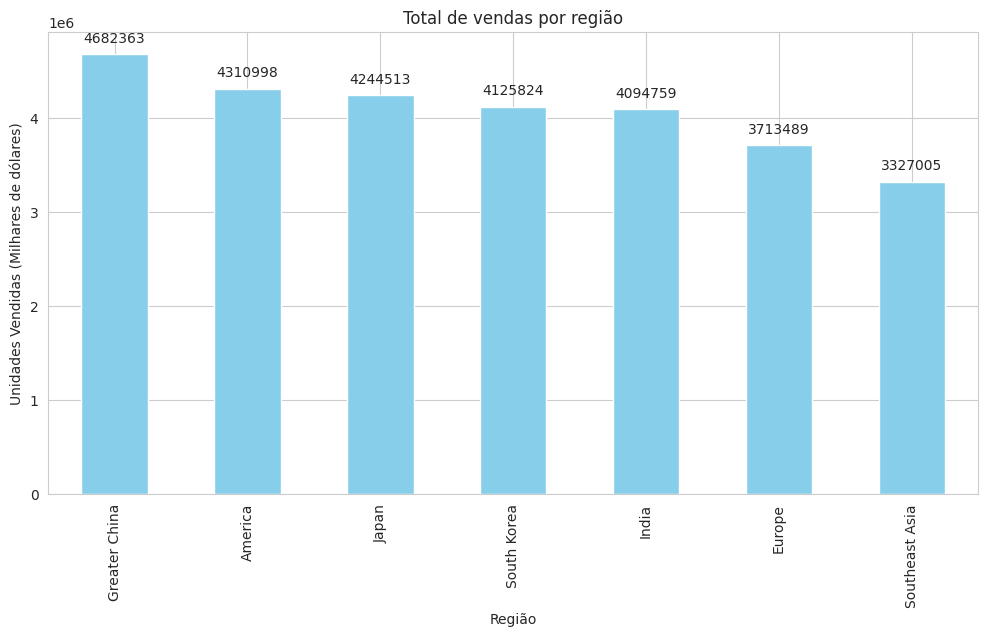

In [101]:
# Total de vendas por região
vendas_regiao = data.groupby('Region')['Units_Sold'].sum().sort_values(ascending=False)

# Gráfico de barras com valores
ax = vendas_regiao.plot(kind='bar', color='skyblue', title="Total de vendas por região")
plt.ylabel('Unidades Vendidas (Milhares de dólares)')  # Escala adicionada aqui
plt.xlabel('Região')

# Adicionando os valores nas barras
for i, valor in enumerate(vendas_regiao):
    ax.text(i, valor + 0.02 * vendas_regiao.max(), f'{valor:.0f}', ha='center', va='bottom')

plt.show()


### 3.2 Receitas por categoria

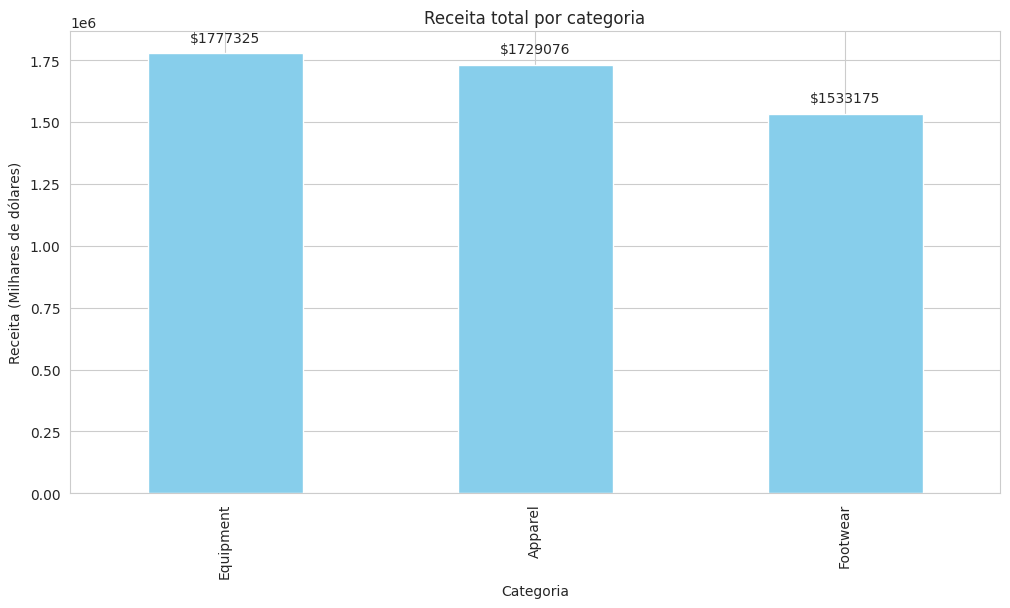

In [102]:
# Receita total por categoria
receita_categoria = data.groupby('Main_Category')['Revenue_USD'].sum().sort_values(ascending=False)

# Converte a receita para milhares
receita_categoria_milhares = receita_categoria / 1_000

# Gráfico de barras com valores
ax = receita_categoria_milhares.plot(kind='bar', color='skyblue', title="Receita total por categoria")
plt.ylabel('Receita (Milhares de dólares)')  # Unidade de medida no eixo Y
plt.xlabel('Categoria')

# Adicionando os valores nas barras
for i, valor in enumerate(receita_categoria_milhares):
    ax.text(i, valor + 0.02 * receita_categoria_milhares.max(), f'${valor:.0f}', ha='center', va='bottom')

plt.show()


### 3.3 Unidades vendidas por categoria

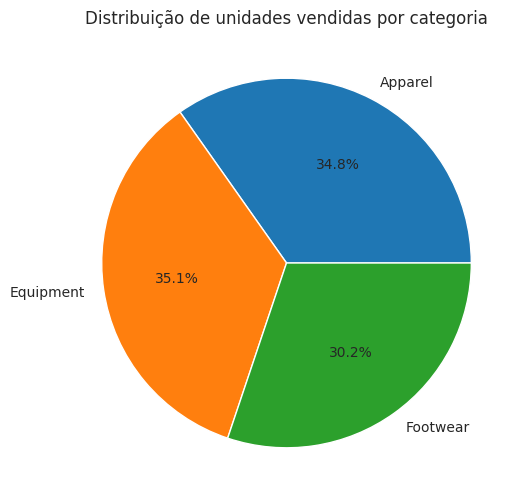

In [103]:
unidades_vendidas = data.groupby('Main_Category')['Units_Sold'].sum()
unidades_vendidas.plot(kind='pie', autopct='%1.1f%%', title='Distribuição de unidades vendidas por categoria', figsize=(6, 6))
plt.ylabel('')
plt.show()

### 3.4 Receita por subcategoria

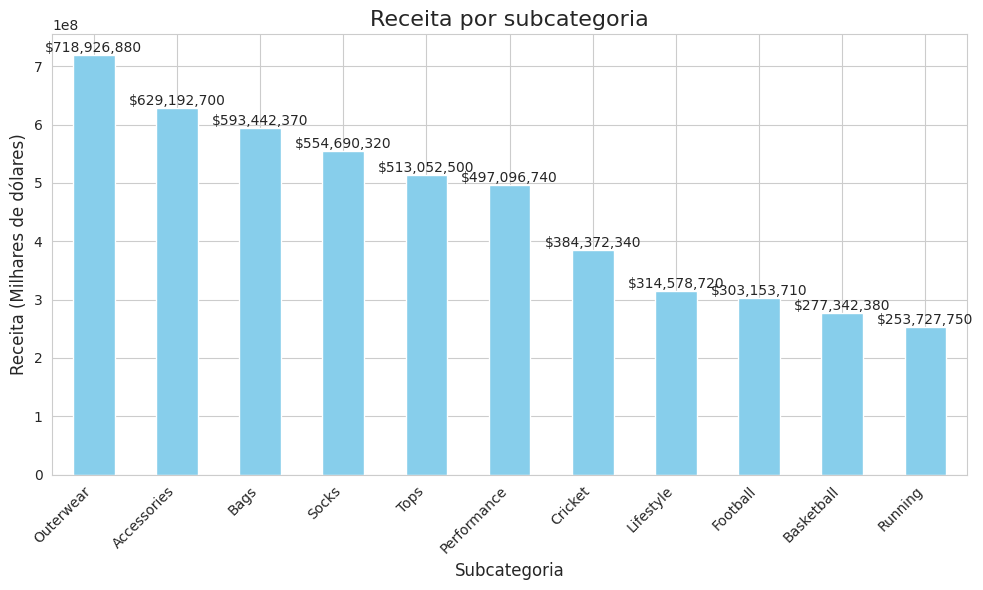

In [104]:
# Agrupando os dados por Sub_Category e somando a Receita (USD)
receita_subcategoria = data.groupby('Sub_Category')['Revenue_USD'].sum().sort_values(ascending=False)

# Criando o gráfico de barras
plt.figure(figsize=(10, 6))
receita_subcategoria.plot(kind='bar', color='skyblue')

# Adicionando título e rótulos aos eixos
plt.title('Receita por subcategoria', fontsize=16)
plt.xlabel('Subcategoria', fontsize=12)
plt.ylabel('Receita (Milhares de dólares)', fontsize=12)

# Exibindo os valores nas barras
for i, v in enumerate(receita_subcategoria):
    plt.text(i, v + 50000, f'${v:,.0f}', ha='center', va='bottom', fontsize=10)

plt.xticks(rotation=45, ha='right')  # Rotaciona os rótulos do eixo X
plt.tight_layout()  # Ajusta o layout para evitar sobreposição
plt.show()

### 3.5 Unidades vendidas por subcategoria

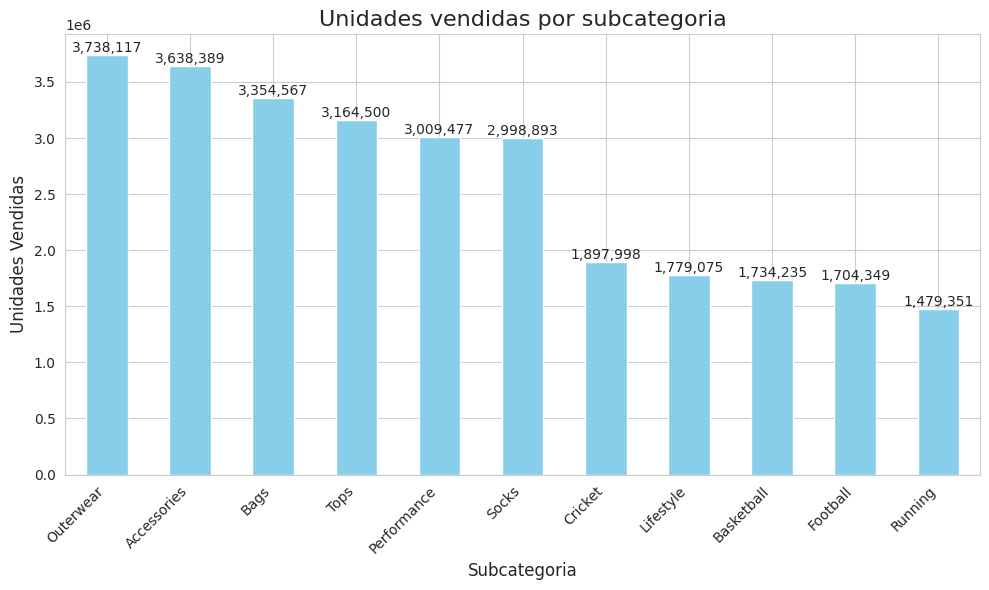

In [105]:
# Agrupando os dados por Sub_Category e somando as Unidades Vendidas
unidades_subcategoria = data.groupby('Sub_Category')['Units_Sold'].sum().sort_values(ascending=False)

# Criando o gráfico de barras
plt.figure(figsize=(10, 6))
unidades_subcategoria.plot(kind='bar', color='skyblue')

# Adicionando título e rótulos aos eixos
plt.title('Unidades vendidas por subcategoria', fontsize=16)
plt.xlabel('Subcategoria', fontsize=12)
plt.ylabel('Unidades Vendidas', fontsize=12)

# Exibindo os valores nas barras
for i, v in enumerate(unidades_subcategoria):
    plt.text(i, v + 50, f'{v:,.0f}', ha='center', va='bottom', fontsize=10)

plt.xticks(rotation=45, ha='right')  # Rotaciona os rótulos do eixo X
plt.tight_layout()  # Ajusta o layout para evitar sobreposição
plt.show()

### 3.6 Vendas online vs. físicas

In [106]:
# Proporção de vendas online
vendas_online = data['Online_Sales_Percentage'].mean()
print(f"Percentual médio de vendas online: {vendas_online:.2f}%")

Percentual médio de vendas online: 70.04%


## 4. Modelos de previsão de vendas

In [107]:
# Pré-processamento
X = data[['Units_Sold', 'Online_Sales_Percentage', 'Retail_Price']]
y = data['Revenue_USD']

# Divisão em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo
modelo = RandomForestRegressor(random_state=42)
modelo.fit(X_train, y_train)

# Previsões
y_pred = modelo.predict(X_test)

# Avaliação
mse = mean_squared_error(y_test, y_pred)  # Calcula o MSE
rmse = np.sqrt(mse)  # Calcula o RMSE manualmente
print(f"RMSE: {rmse:.2f}")

RMSE: 148194.38


## 5. Identificação de tendências de mercado e análise regional

### 5.1 Tendências de receita ao longo do ano

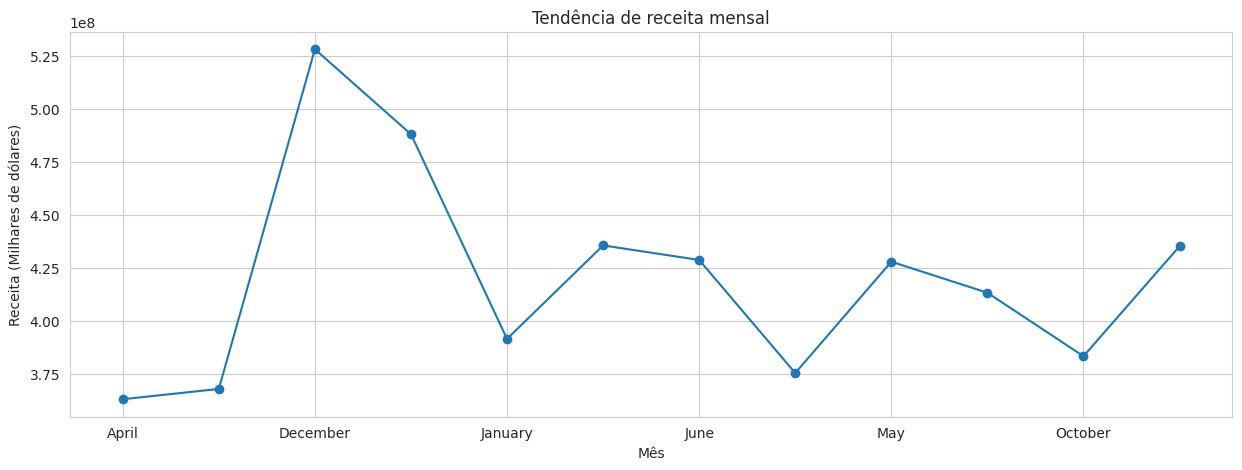

In [108]:
tendencia_receita = data.groupby('Month')['Revenue_USD'].sum()
tendencia_receita.plot(marker='o', title='Tendência de receita mensal', figsize=(15, 5))
plt.ylabel('Receita (Milhares de dólares)')
plt.xlabel('Mês')
plt.show()


### 5.2 Análise temporal por região

In [109]:
# Adicionando o ano ao nome do mês
data['Month'] = data['Month'] + ' 2024'

# Convertendo para datetime
data['Month'] = pd.to_datetime(data['Month'], format='%B %Y')

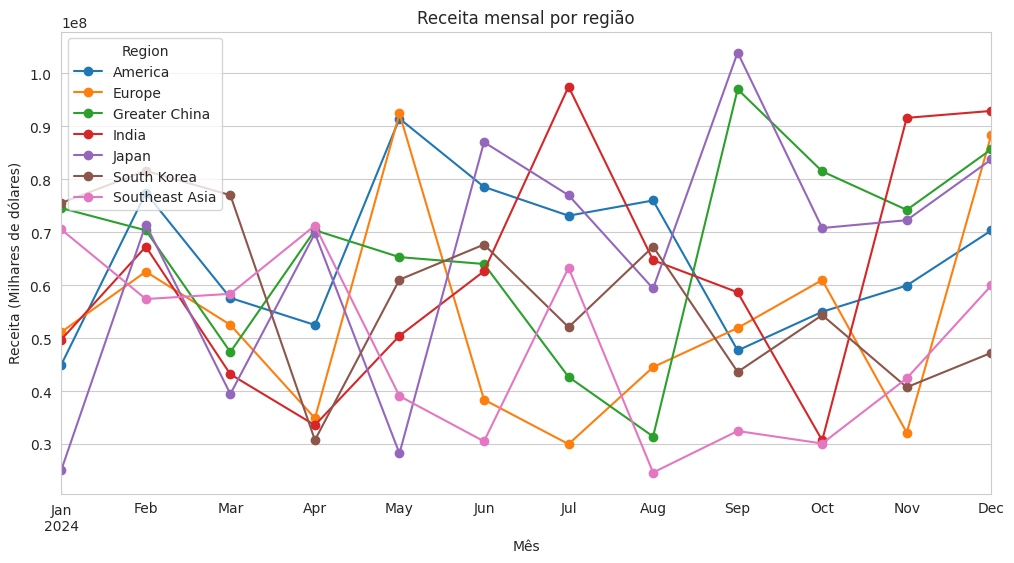

In [110]:
# Receita mensal por região
data['Month'] = pd.to_datetime(data['Month'], format='%Y-%m')

receita_mensal = data.groupby(['Month', 'Region'])['Revenue_USD'].sum().unstack()
receita_mensal.plot(marker='o', title="Receita mensal por região")
plt.ylabel('Receita (Milhares de dólares)')
plt.xlabel('Mês')
plt.show()

### 5.2 Categorias Mais Vendidas por Região

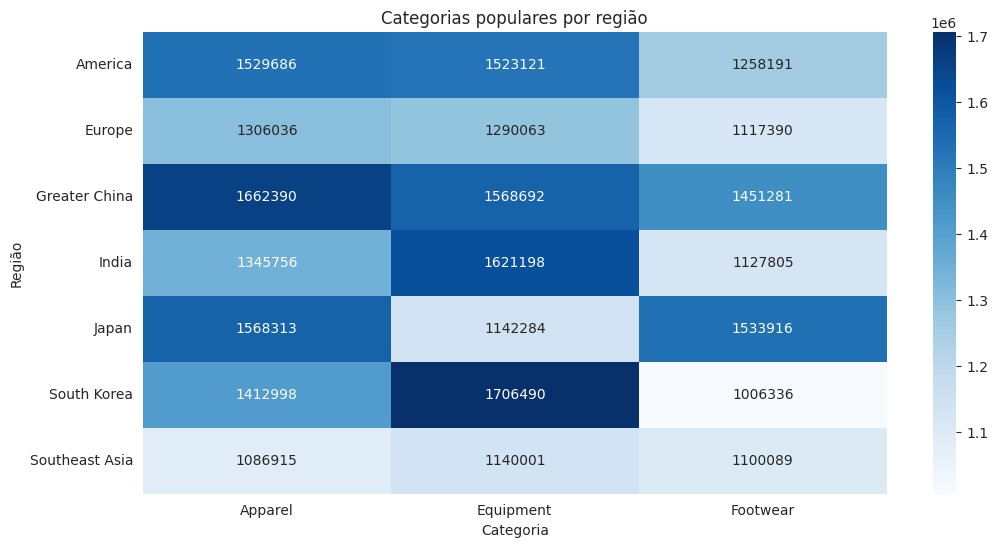

In [111]:
# Categorias populares por região
categoria_regiao = data.groupby(['Region', 'Main_Category'])['Units_Sold'].sum().unstack()
sns.heatmap(categoria_regiao, annot=True, fmt=".0f", cmap="Blues", cbar=True)
plt.title("Categorias populares por região")
plt.ylabel('Região')
plt.xlabel('Categoria')
plt.show()